In [1]:
# import modules to be used

import plotly
import plotly.express as px
import pandas as pd
import country_converter as coco


In [2]:
# load CSV file with header and index parameters
country_data = pd.read_csv('Nomics.csv',
                           header = None)
country_data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,id,name,logo_url,transparency_grade,coverage_type,order_books,first_trade,first_candle,first_order_book,num_pairs,...,1d.trades_change,1d.trades_change_pct,1d.spot_volume,1d.spot_volume_change,1d.spot_volume_change_pct,1d.derivative_volume,1d.derivative_volume_change,1d.derivative_volume_change_pct,location,website_url
1,binance,Binance,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,true,2017-07-13T00:00:00Z,2017-07-13T00:00:00Z,2018-08-29T00:00:00Z,2135,...,-4183892,-0.0885,13040185693.24,-1190569292.74,-0.0837,21928712277.93,-1483202948.83,-0.0634,Malta,https://www.binance.com/
2,ftx,FTX,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,true,2019-03-05T00:00:00Z,2019-03-05T00:00:00Z,2019-10-15T00:00:00Z,1944,...,-335104,-0.0388,1863078722.55,147077284.39,0.0857,15949880900.17,5437599467.31,0.5173,Antigua and Barbuda,https://ftx.com/
3,cryptomkt,CryptoMarket,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,true,2013-12-27T00:00:00Z,2013-12-27T00:00:00Z,2021-12-01T00:00:00Z,149,...,-24289,-0.0455,3133990568.90,-274230807.25,-0.0805,NaN,NaN,NaN,Chile,https://www.cryptomkt.com/
4,gdax,Coinbase Exchange,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,true,2014-12-01T00:00:00Z,2014-12-01T00:00:00Z,2018-09-11T00:00:00Z,434,...,-137715,-0.0300,3075137778.04,-135887665.72,-0.0423,NaN,NaN,NaN,United States,https://www.coinbase.com/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,empiredex_bsc,Empire DEX (BSC),https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,true,2021-08-07T00:00:00Z,2021-08-07T00:00:00Z,2021-10-27T00:00:00Z,21,...,-41,-0.3868,12952.09,-3772.80,-0.2256,NaN,NaN,NaN,NaN,https://www.empiredex.org
97,qtrade,qTrade,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,true,2018-04-27T00:00:00Z,2018-04-27T00:00:00Z,2020-02-10T00:00:00Z,53,...,11,0.0764,11062.43,2714.30,0.3251,NaN,NaN,NaN,United States,https://qtrade.io
98,levinswap,Levinswap,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,true,2021-01-16T00:00:00Z,2021-01-16T00:00:00Z,2021-10-27T00:00:00Z,63,...,-135,-0.0959,6530.57,2660.55,0.6875,NaN,NaN,NaN,NaN,https://levinswap.org
99,baguette,Baguette,https://s3.us-east-2.amazonaws.com/nomics-api/...,A,trades,true,2021-04-30T00:00:00Z,2021-04-30T00:00:00Z,2021-10-27T00:00:00Z,54,...,-30,-0.2400,5209.10,1641.52,0.4601,NaN,NaN,NaN,NaN,https://baguette.exchange


### Clean up data

In [3]:
# removed columns

exchange_data = country_data.drop([0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27], axis=True)
exchange_data

,1,23,28,29,30
0,name,1d.spot_volume,1d.derivative_volume_change_pct,location,website_url
1,Binance,13040185693.24,-0.0634,Malta,https://www.binance.com/
2,FTX,1863078722.55,0.5173,Antigua and Barbuda,https://ftx.com/
3,CryptoMarket,3133990568.90,NaN,Chile,https://www.cryptomkt.com/
4,Coinbase Exchange,3075137778.04,NaN,United States,https://www.coinbase.com/
...,...,...,...,...,...
96,Empire DEX (BSC),12952.09,NaN,NaN,https://www.empiredex.org
97,qTrade,11062.43,NaN,United States,https://qtrade.io
98,Levinswap,6530.57,NaN,NaN,https://levinswap.org
99,Baguette,5209.10,NaN,NaN,https://baguette.exchange


In [4]:
# check missing data in location column
exchange_data.iloc[:,-2].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
96      True
97     False
98      True
99      True
100     True
Name: 29, Length: 101, dtype: bool

In [5]:
exchange_data.isnull().sum()

1      0
23     3
28    90
29    52
30     0
dtype: int64

In [6]:
#rename columns
exchange_data = exchange_data.rename(columns = {29:'country'})
exchange_data = exchange_data.rename(columns = {28:'continent'})
exchange_data = exchange_data.rename(columns = {1:'name'})
exchange_data = exchange_data.rename(columns = {30:'website'})
exchange_data = exchange_data.rename(columns = {23:'volume'})
exchange_data.head()

,name,volume,continent,country,website
0,name,1d.spot_volume,1d.derivative_volume_change_pct,location,website_url
1,Binance,13040185693.24,-0.0634,Malta,https://www.binance.com/
2,FTX,1863078722.55,0.5173,Antigua and Barbuda,https://ftx.com/
3,CryptoMarket,3133990568.90,NaN,Chile,https://www.cryptomkt.com/
4,Coinbase Exchange,3075137778.04,NaN,United States,https://www.coinbase.com/


In [7]:
# Convert country codes to ISO3 code

cc = coco.CountryConverter()
iso3_codes = cc.convert(names=exchange_data.iloc[:,-2], to ='ISO3', not_found=None)
print(iso3_codes)

location not found in regex
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan 

['location', 'MLT', 'ATG', 'CHL', 'USA', 'USA', 'CYM', 'SYC', 'CHN', 'USA', 'VGB', 'SGP', 'JPN', 'JPN', 'CHE', 'USA', 'SGP', 'nan', 'LUX', 'SYC', 'nan', 'nan', 'USA', 'USA', 'nan', 'JPN', 'USA', 'nan', 'nan', 'USA', 'nan', 'nan', 'USA', 'nan', 'nan', 'SGP', 'nan', 'MYS', 'GBR', 'nan', 'nan', 'CAN', 'nan', 'MEX', 'nan', 'nan', 'nan', 'EST', 'nan', 'USA', 'VGB', 'SYC', 'nan', 'SYC', 'nan', 'USA', 'nan', 'nan', 'BRA', 'BLR', 'JPN', 'nan', 'nan', 'IRN', 'MLT', 'EST', 'nan', 'ITA', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'GBR', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'NLD', 'LUX', 'nan', 'nan', 'nan', 'USA', 'nan', 'nan', 'nan', 'FRA', 'nan', 'nan', 'USA', 'nan', 'nan', 'nan']


In [8]:
# Replace NAN with DEX for decentralized exchanges
# exchange_data.iloc[:,-2].fillna('DEX',
#                              inplace = True
#                              )
#exchange_data

In [9]:
#replace location column with updated ISO country codes
exchange_data.iloc[:,-2] = iso3_codes
exchange_data

,name,volume,continent,country,website
0,name,1d.spot_volume,1d.derivative_volume_change_pct,location,website_url
1,Binance,13040185693.24,-0.0634,MLT,https://www.binance.com/
2,FTX,1863078722.55,0.5173,ATG,https://ftx.com/
3,CryptoMarket,3133990568.90,NaN,CHL,https://www.cryptomkt.com/
4,Coinbase Exchange,3075137778.04,NaN,USA,https://www.coinbase.com/
...,...,...,...,...,...
96,Empire DEX (BSC),12952.09,NaN,nan,https://www.empiredex.org
97,qTrade,11062.43,NaN,USA,https://qtrade.io
98,Levinswap,6530.57,NaN,nan,https://levinswap.org
99,Baguette,5209.10,NaN,nan,https://baguette.exchange


In [10]:
# Remove row 
exchange_data.drop([0],axis=0, inplace=True)

In [11]:
exchange_data.head(30)

,name,volume,continent,country,website
1,Binance,13040185693.24,-0.0634,MLT,https://www.binance.com/
2,FTX,1863078722.55,0.5173,ATG,https://ftx.com/
3,CryptoMarket,3133990568.90,NaN,CHL,https://www.cryptomkt.com/
4,Coinbase Exchange,3075137778.04,NaN,USA,https://www.coinbase.com/
5,Uniswap V3 (Ethereum),1675489178.00,NaN,USA,https://uniswap.org
6,Gate.io,1096211749.78,NaN,CYM,https://www.gate.io/
7,Bitmex,NaN,0.2049,SYC,https://www.bitmex.com/
8,Lbank,934057841.28,NaN,CHN,https://www.lbank.info/
9,Kraken,884269444.37,NaN,USA,https://www.kraken.com/
10,DeversiFi,874410932.85,NaN,VGB,https://www.deversifi.com/


In [12]:

# Convert ISO3 countrycodes to their relative Continent
continents = cc.convert(names=exchange_data.iloc[:,-2], to ='continent', not_found=None)

nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not fo

In [13]:
# Verify continent conversion
print(continents)

['Europe', 'America', 'America', 'America', 'America', 'America', 'Africa', 'Asia', 'America', 'America', 'Asia', 'Asia', 'Asia', 'Europe', 'America', 'Asia', 'nan', 'Europe', 'Africa', 'nan', 'nan', 'America', 'America', 'nan', 'Asia', 'America', 'nan', 'nan', 'America', 'nan', 'nan', 'America', 'nan', 'nan', 'Asia', 'nan', 'Asia', 'Europe', 'nan', 'nan', 'America', 'nan', 'America', 'nan', 'nan', 'nan', 'Europe', 'nan', 'America', 'America', 'Africa', 'nan', 'Africa', 'nan', 'America', 'nan', 'nan', 'America', 'Europe', 'Asia', 'nan', 'nan', 'Asia', 'Europe', 'Europe', 'nan', 'Europe', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'Europe', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'Europe', 'Europe', 'nan', 'nan', 'nan', 'America', 'nan', 'nan', 'nan', 'Europe', 'nan', 'nan', 'America', 'nan', 'nan', 'nan']


In [14]:
# Add continent column
exchange_data.iloc[:,-3] = continents
exchange_data.head(20)

,name,volume,continent,country,website
1,Binance,13040185693.24,Europe,MLT,https://www.binance.com/
2,FTX,1863078722.55,America,ATG,https://ftx.com/
3,CryptoMarket,3133990568.90,America,CHL,https://www.cryptomkt.com/
4,Coinbase Exchange,3075137778.04,America,USA,https://www.coinbase.com/
5,Uniswap V3 (Ethereum),1675489178.00,America,USA,https://uniswap.org
6,Gate.io,1096211749.78,America,CYM,https://www.gate.io/
7,Bitmex,NaN,Africa,SYC,https://www.bitmex.com/
8,Lbank,934057841.28,Asia,CHN,https://www.lbank.info/
9,Kraken,884269444.37,America,USA,https://www.kraken.com/
10,DeversiFi,874410932.85,America,VGB,https://www.deversifi.com/


In [15]:
exchange_data.replace(to_replace='nan',value = 'DEX = 52', inplace = True)
exchange_data.head(30)

,name,volume,continent,country,website
1,Binance,13040185693.24,Europe,MLT,https://www.binance.com/
2,FTX,1863078722.55,America,ATG,https://ftx.com/
3,CryptoMarket,3133990568.90,America,CHL,https://www.cryptomkt.com/
4,Coinbase Exchange,3075137778.04,America,USA,https://www.coinbase.com/
5,Uniswap V3 (Ethereum),1675489178.00,America,USA,https://uniswap.org
6,Gate.io,1096211749.78,America,CYM,https://www.gate.io/
7,Bitmex,NaN,Africa,SYC,https://www.bitmex.com/
8,Lbank,934057841.28,Asia,CHN,https://www.lbank.info/
9,Kraken,884269444.37,America,USA,https://www.kraken.com/
10,DeversiFi,874410932.85,America,VGB,https://www.deversifi.com/


In [16]:
exchange_data.insert(5,'DEX','')

In [17]:
exchange_data.fillna(0, inplace = True)
display(exchange_data.head(50))
display(exchange_data.tail(50))

,name,volume,continent,country,website,DEX
1,Binance,13040185693.24,Europe,MLT,https://www.binance.com/,
2,FTX,1863078722.55,America,ATG,https://ftx.com/,
3,CryptoMarket,3133990568.90,America,CHL,https://www.cryptomkt.com/,
4,Coinbase Exchange,3075137778.04,America,USA,https://www.coinbase.com/,
5,Uniswap V3 (Ethereum),1675489178.00,America,USA,https://uniswap.org,
6,Gate.io,1096211749.78,America,CYM,https://www.gate.io/,
7,Bitmex,0,Africa,SYC,https://www.bitmex.com/,
8,Lbank,934057841.28,Asia,CHN,https://www.lbank.info/,
9,Kraken,884269444.37,America,USA,https://www.kraken.com/,
10,DeversiFi,874410932.85,America,VGB,https://www.deversifi.com/,


,name,volume,continent,country,website,DEX
51,Nominex,7383749.37,Africa,SYC,https://nominex.io/,
52,Solarbeam,6319961.89,DEX = 52,DEX = 52,https://solarbeam.io,
53,CoinFLEX,5926955.56,Africa,SYC,https://coinflex.com/,
54,VVS Finance,5235976.76,DEX = 52,DEX = 52,https://vvs.finance,
55,CrossTower,4796290.68,America,USA,https://crosstower.com/,
56,ViperSwap,4643066.88,DEX = 52,DEX = 52,https://viper.exchange/,
57,Dfyn (Polygon),3542849.09,DEX = 52,DEX = 52,https://www.dfyn.network,
58,Mercado Bitcoin,3337846.89,America,BRA,https://www.mercadobitcoin.com.br/,
59,Currency.com,2954186.83,Europe,BLR,https://currency.com/,
60,PancakeSwap V1,2589297.18,Asia,JPN,https://pancakeswap.finance,


# Build interactive map

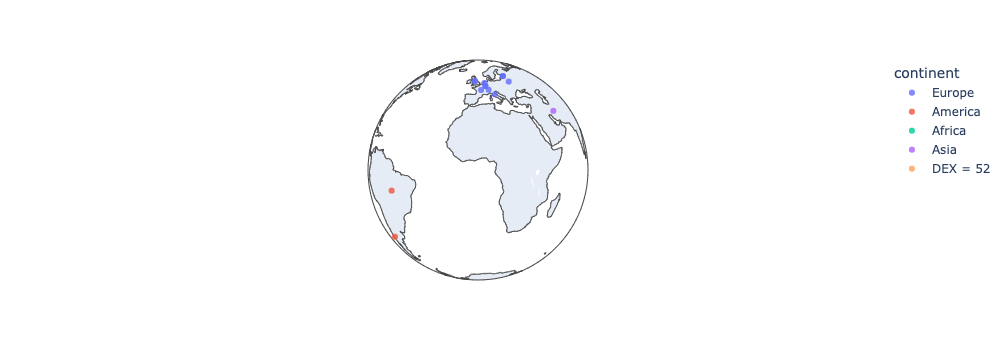

In [22]:
#Set plot parameters

map_fig = px.scatter_geo(exchange_data,
                         locations = 'country',
                         projection = 'orthographic',
                         color = 'continent',
                         opacity = .8,
                         hover_name = 'name',
                         hover_data = ['volume','website']
)

# Display Map
map_fig.show()

In [23]:
# save offline copy of fully functional map
plotly.offline.plot(map_fig,filename ='C:\worldwide_exchanges.html', auto_open = True)


'C:\\worldwide_exchanges.html'